# 452 Assignment 4
## Colin Chen, Jessica Yang, Sreeja Macha

# **1. Exploratory Data Analysis (EDA)**
*   Conduct a thorough exploration of the provided datasets. This includes understanding the structure, identifying missing values, and summarizing key statistics.  
*   Generate visualizations to understand the distribution of important variables, relationships between different variables, and any other patterns or anomalies in the data such as peculiar patterns or outliers.



In [ ]:
import pandas as pd
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegressionCV
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

In [ ]:
# please change file name, I changed on my laptop to make it more clear.
medical_claims = pd.read_csv("Medical Claims Data SMALL.csv")
prescription = pd.read_csv("Prescription Data SMALL.csv")

/var/folders/bz/g4zc7htx7mb9lym_bdfst95h0000gn/T/ipykernel_8350/199037430.py:3: DtypeWarning: Columns (9,10,29,43) have mixed types. Specify dtype option on import or set low_memory=False.
  prescription = pd.read_csv("Prescription Data SMALL.csv")


In [ ]:
medical_claims = medical_claims.loc[:, ~medical_claims.columns.str.contains('^Unnamed')]
prescription = prescription.loc[:, ~prescription.columns.str.contains('^Unnamed')]

In [ ]:
medical_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623525 entries, 0 to 623524
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         623525 non-null  object 
 1   episode_id         623525 non-null  object 
 2   visit_id           621650 non-null  object 
 3   encounter_id       623525 non-null  object 
 4   claim_date         623525 non-null  object 
 5   patient_state      623525 non-null  object 
 6   patient_short_zip  623512 non-null  float64
 7   patient_age        616980 non-null  float64
 8   patient_gender     623393 non-null  object 
 9   place_of_service   484555 non-null  object 
 10  visit_type         600454 non-null  object 
 11  payor              608936 non-null  object 
 12  payor_channel      586086 non-null  object 
 13  ref_npi            297501 non-null  float64
 14  hcp_npi            434653 non-null  float64
 15  hcp_taxonomy       428209 non-null  object 
 16  hc

In [ ]:
filtered_medical_claims = medical_claims[medical_claims['proc_code'] == "J3490"]

In [ ]:
filtered_medical_claims.info()

<class 'pandas.core.frame.DataFrame'>
Index: 772 entries, 216 to 622748
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   journey_id         772 non-null    object 
 1   episode_id         772 non-null    object 
 2   visit_id           772 non-null    object 
 3   encounter_id       772 non-null    object 
 4   claim_date         772 non-null    object 
 5   patient_state      772 non-null    object 
 6   patient_short_zip  772 non-null    float64
 7   patient_age        750 non-null    float64
 8   patient_gender     772 non-null    object 
 9   place_of_service   203 non-null    object 
 10  visit_type         752 non-null    object 
 11  payor              749 non-null    object 
 12  payor_channel      729 non-null    object 
 13  ref_npi            171 non-null    float64
 14  hcp_npi            660 non-null    float64
 15  hcp_taxonomy       658 non-null    object 
 16  hcp_specialty      658 non

In [ ]:
prescription.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894623 entries, 0 to 894622
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   journey_id                     894623 non-null  object 
 1   cohort_id                      894623 non-null  int64  
 2   claim_id                       894623 non-null  object 
 3   patient_gender                 894623 non-null  object 
 4   patient_state                  894623 non-null  object 
 5   patient_zip                    894501 non-null  float64
 6   patient_dob                    894619 non-null  object 
 7   pharmacy_npi                   839958 non-null  float64
 8   pharmacist_npi                 21578 non-null   float64
 9   prescriber_npi                 891155 non-null  object 
 10  primary_care_npi               3569 non-null    object 
 11  group_id                       273621 non-null  object 
 12  date_of_service               

In [ ]:
# 1. Select 'diag_list' columns in "medical_claims"
diag_columns = [col for col in medical_claims[['diag_list']]]
medical_claims_diag = medical_claims[diag_columns]

# 2. select the first 5 diags from the diag_list (comma separated)
combined_list = medical_claims_diag.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]
combined_list = [','.join(item.split(',')[:5]) for item in combined_list]

# 3. Process first three digits
first_three_counts = {}
for diag_code in combined_list:
    first_three = diag_code[:3]
    first_three_counts[first_three] = first_three_counts.get(first_three, 0) + 1

In [ ]:
import operator

# Sort the dictionary items by count in descending
sorted_counts = sorted(first_three_counts.items(), key=operator.itemgetter(1), reverse=True)

for items in sorted_counts:
    print(items)

('E11', 67763)
('I10', 43637)
('Z00', 41090)
('M54', 15013)
('M25', 14575)
('E78', 13666)
('Z01', 10971)
('R07', 9773)
('G47', 9698)
('R10', 9541)
('Z12', 9168)
('N18', 8588)
('M17', 7358)
('N39', 6350)
('M79', 6232)
('E66', 5882)
('Z20', 5231)
('R73', 4732)
('Z13', 4583)
('D64', 4535)
('R06', 4306)
('R68', 4147)
('U07', 4049)
('E03', 3735)
('A41', 3734)
('I25', 3688)
('J44', 3667)
('R53', 3513)
('E55', 3511)
('Z68', 3432)
('Z23', 3133)
('I48', 3090)
('Z79', 3015)
('Z71', 2843)
('R05', 2780)
('F33', 2780)
('M47', 2755)
('Z76', 2734)
('I50', 2720)
('I11', 2580)
('C50', 2543)
('L03', 2372)
('N40', 2300)
('F41', 2220)
('Z11', 2214)
('J96', 2179)
('H25', 2177)
('R42', 2165)
('R51', 2163)
('M51', 2147)
('M19', 2113)
('J45', 2089)
('Z51', 2032)
('M48', 2019)
('D50', 1894)
('G89', 1893)
('K80', 1786)
('B35', 1776)
('N20', 1722)
('R79', 1699)
('K21', 1693)
('R19', 1608)
('I12', 1559)
('M75', 1556)
('M16', 1546)
('N17', 1518)
('C61', 1499)
('H40', 1489)
('K57', 1488)
('J06', 1465)
('R00', 1442)

# TOP 5 OCC
E11  Type 2 diabetes mellitus

I10  Essential (primary) hypertension

Z00  Encounter for general examination without complaint, suspected or reported diagnosis

M54  Dorsalgia

M25  Other joint disorder, not elsewhere classified (NOT that meaningful)

E78  Disorders of lipoprotein metabolism and other lipidemias

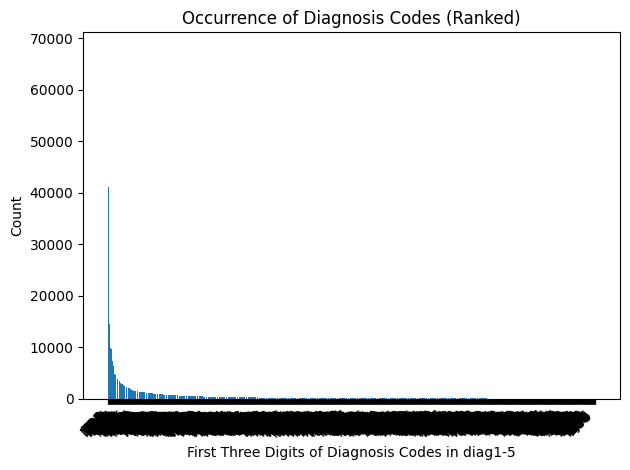

In [ ]:
# Extract labels and values
labels = [item[0] for item in sorted_counts]
values = [item[1] for item in sorted_counts]

# Create the bar chart
plt.bar(labels, values)

# Labels and title
plt.xlabel("First Three Digits of Diagnosis Codes in diag1-5")
plt.ylabel("Count")
plt.title("Occurrence of Diagnosis Codes (Ranked)")

# Optional: Rotate x labels if they are long or overlapping
if len(labels) > 5:
    plt.xticks(rotation=45, ha='right')

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# 1. Select 'diag_list' columns in "medical_claims"
filtered_diag_columns = [col for col in filtered_medical_claims[['diag_list']]]
filtered_medical_claims_diag = filtered_medical_claims[filtered_diag_columns]

# 2. select the first 5 diags from the diag_list (comma separated)
filtered_combined_list = filtered_medical_claims_diag.values.flatten().tolist()
filtered_combined_list = [x for x in filtered_combined_list if pd.notna(x)]
filtered_combined_list = [','.join(item.split(',')[:5]) for item in filtered_combined_list]

# 3. Process first three digits
filtered_first_three_counts = {}
for diag_code in filtered_combined_list:
    filtered_first_three = diag_code[:3]
    filtered_first_three_counts[filtered_first_three] = filtered_first_three_counts.get(filtered_first_three, 0) + 1

filtered_sorted_counts = sorted(filtered_first_three_counts.items(), key=operator.itemgetter(1), reverse=True)

for items in filtered_sorted_counts:
    print(items)

('N18', 42)
('E11', 34)
('I25', 31)
('Z51', 27)
('M54', 26)
('R07', 24)
('R10', 18)
('H25', 15)
('Z30', 14)
('G89', 14)
('J45', 13)
('M17', 12)
('M19', 12)
('M25', 11)
('I48', 11)
('F33', 11)
('M48', 10)
('M47', 9)
('J20', 9)
('C50', 9)
('I10', 9)
('M70', 8)
('J44', 8)
('R94', 7)
('N20', 7)
('R51', 6)
('M16', 6)
('D50', 6)
('K29', 6)
('J30', 6)
('C61', 6)
('K40', 6)
('L02', 6)
('M53', 5)
('R06', 5)
('L72', 5)
('K42', 5)
('E78', 5)
('N13', 5)
('I49', 4)
('R42', 4)
('G43', 4)
('Z12', 4)
('K80', 4)
('U07', 4)
('D12', 4)
('K85', 4)
('Z45', 4)
('M75', 4)
('K43', 4)
('K57', 4)
('N39', 4)
('I11', 4)
('T85', 4)
('N12', 4)
('N95', 4)
('M32', 4)
('T83', 4)
('C18', 4)
('K60', 3)
('C67', 3)
('K21', 3)
('C43', 3)
('G44', 3)
('Z48', 3)
('S01', 3)
('I83', 3)
('T81', 3)
('K64', 3)
('J32', 3)
('D25', 3)
('S09', 3)
('Z01', 3)
('E10', 3)
('K31', 3)
('K62', 3)
('H35', 3)
('T84', 3)
('K44', 3)
('S83', 2)
('I47', 2)
('Z42', 2)
('N93', 2)
('J96', 2)
('F10', 2)
('T78', 2)
('J18', 2)
('M79', 2)
('T82', 2)
('H1

# TOP 7 OCC for OZP Users
N18  Chronic kidney disease (CKD)

E11  Type 2 diabetes mellitus

I25  Chronic ischemic heart disease

Z51  Encounter for other aftercare and medical care

M54  Dorsalgia

R07  Pain in throat and chest

R10  Abdominal and pelvic pain

In [ ]:
# 1. Select 'zip' columns
medical_claims_zip = medical_claims['patient_short_zip']

# 2. Combine values
combined_list_zip = medical_claims_zip.values.flatten().tolist()
combined_list_zip = [x for x in combined_list_zip if pd.notna(x)]

# 3. Process first three digits (same as before)
zips = {}
for diag_code in combined_list_zip:
    zips[diag_code] = zips.get(diag_code, 0) + 1

In [ ]:
#import operator
# Sort the dictionary items by count (descending order)
sorted_counts_zip = sorted(zips.items(), key=operator.itemgetter(1), reverse=True)

for items in sorted_counts_zip:
    print(items)

(900.0, 180469)
(922.0, 166422)
(908.0, 55562)
(921.0, 51190)
(910.0, 48395)
(913.0, 34571)
(912.0, 34143)
(911.0, 32244)
(853.0, 6499)
(857.0, 2952)
(852.0, 2399)
(864.0, 1480)
(856.0, 1456)
(350.0, 1259)
(351.0, 637)
(352.0, 530)
(863.0, 495)
(859.0, 447)
(855.0, 430)
(995.0, 370)
(996.0, 359)
(860.0, 311)
(997.0, 291)
(344.0, 58)
(194.0, 42)
(850.0, 39)
(272.0, 33)
(891.0, 32)
(923.0, 25)
(304.0, 25)
(998.0, 23)
(320.0, 22)
(91.0, 22)
(629.0, 18)
(606.0, 18)
(770.0, 17)
(105.0, 15)
(787.0, 12)
(841.0, 12)
(895.0, 9)
(483.0, 9)
(333.0, 9)
(328.0, 8)
(527.0, 8)
(112.0, 8)
(370.0, 8)
(372.0, 7)
(773.0, 7)
(722.0, 7)
(170.0, 7)
(330.0, 6)
(924.0, 6)
(334.0, 6)
(528.0, 5)
(720.0, 5)
(752.0, 4)
(776.0, 4)
(524.0, 4)
(337.0, 4)
(612.0, 3)
(999.0, 3)
(88.0, 3)
(503.0, 3)
(619.0, 3)
(890.0, 3)
(933.0, 2)
(774.0, 2)
(631.0, 2)
(74.0, 2)
(478.0, 2)
(782.0, 2)
(523.0, 2)
(917.0, 2)
(554.0, 2)
(200.0, 2)
(442.0, 2)
(109.0, 1)
(481.0, 1)
(925.0, 1)
(610.0, 1)
(495.0, 1)
(321.0, 1)
(427.0, 1)
(616

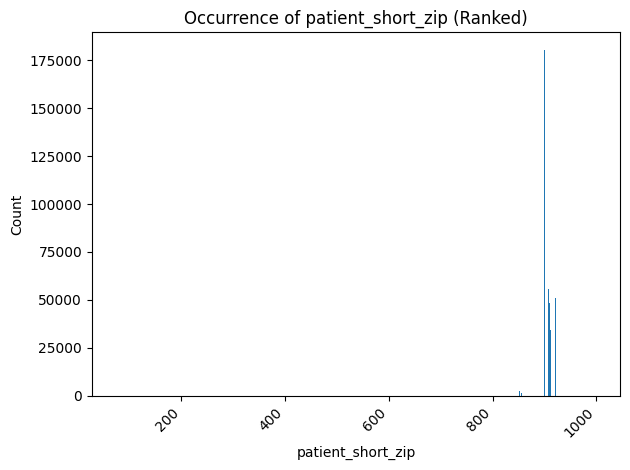

In [ ]:
# Extract labels and values
labels = [item[0] for item in sorted_counts_zip]
values = [item[1] for item in sorted_counts_zip]

# Create the bar chart
plt.bar(labels, values)

# Labels and title
plt.xlabel("patient_short_zip")
plt.ylabel("Count")
plt.title("Occurrence of patient_short_zip (Ranked)")

# Optional: Rotate x labels if they are long or overlapping
if len(labels) > 5:
    plt.xticks(rotation=45, ha='right')

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# 1. Select 'zip' columns

filtered_medical_claims_zip = filtered_medical_claims['patient_short_zip']

# 2. Combine values
filtered_combined_list_zip = filtered_medical_claims_zip.values.flatten().tolist()
filtered_combined_list_zip = [x for x in filtered_combined_list_zip if pd.notna(x)]

# 3. Process first three digits (same as before)
filtered_zips = {}
for diag_code in filtered_combined_list_zip:
    filtered_zips[diag_code] = filtered_zips.get(diag_code, 0) + 1

filtered_sorted_counts_zip = sorted(filtered_zips.items(), key=operator.itemgetter(1), reverse=True)

for items in filtered_sorted_counts_zip:
    print(items)

(921.0, 288)
(922.0, 140)
(908.0, 128)
(910.0, 93)
(911.0, 49)
(912.0, 47)
(853.0, 12)
(852.0, 7)
(864.0, 3)
(350.0, 2)
(857.0, 2)
(859.0, 1)


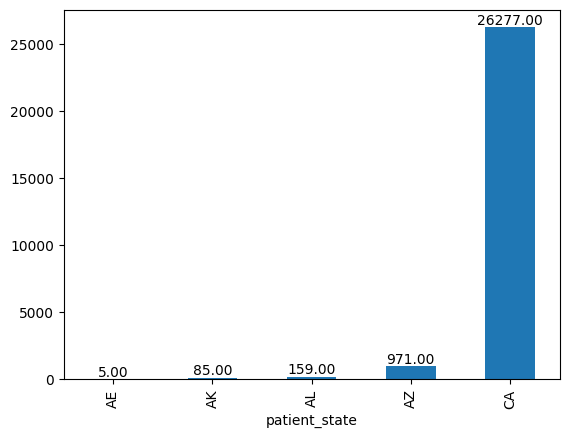

In [ ]:
# Check the number of patients' states
patient_state_cnt = medical_claims.groupby('patient_state')['journey_id'].nunique()

# plot a bar plot
patient_state_cnt.plot.bar()
for i, v in enumerate(patient_state_cnt):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

In [ ]:
medical_claims_obesity = medical_claims[
      medical_claims['diag_1'].str.startswith("E66")|
      medical_claims['diag_2'].str.startswith("E66")|
      medical_claims['diag_3'].str.startswith("E66")|
      medical_claims['diag_4'].str.startswith("E66")|
      medical_claims['diag_5'].str.startswith("E66")
      ]

In [ ]:
medical_claims_obesity['diag'] = "Obesity"
medical_claims_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63026 entries, 22 to 623506
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   journey_id         63026 non-null  object 
 1   episode_id         63026 non-null  object 
 2   visit_id           62900 non-null  object 
 3   encounter_id       63026 non-null  object 
 4   claim_date         63026 non-null  object 
 5   patient_state      63026 non-null  object 
 6   patient_short_zip  63018 non-null  float64
 7   patient_age        62224 non-null  float64
 8   patient_gender     63023 non-null  object 
 9   place_of_service   50211 non-null  object 
 10  visit_type         59858 non-null  object 
 11  payor              60251 non-null  object 
 12  payor_channel      58314 non-null  object 
 13  ref_npi            24221 non-null  float64
 14  hcp_npi            49907 non-null  float64
 15  hcp_taxonomy       49357 non-null  object 
 16  hcp_specialty      49357 

/var/folders/bz/g4zc7htx7mb9lym_bdfst95h0000gn/T/ipykernel_8350/3827100762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medical_claims_obesity['diag'] = "Obesity"


In [ ]:
patients_gender_cnt = medical_claims_obesity.groupby(['diag', 'patient_gender'])['journey_id'].nunique().reset_index(name = 'count')
total_cnt = patients_gender_cnt.groupby('diag')['count'].transform('sum')
patients_gender_cnt['gender_ratio'] = patients_gender_cnt['count']/total_cnt
patients_gender_cnt

,diag,patient_gender,count,gender_ratio
0,Obesity,F,6422,0.587235
1,Obesity,M,4514,0.412765


In [ ]:
# Find the # of missing values for each column
medical_claims_missing_values_count = medical_claims.isna().sum()
print("Number of missing values for each column is:\n",medical_claims_missing_values_count, '\nBuildingArea and YearBuilt has unnormal high missing values numbers.')

Number of missing values for each column is:
 journey_id                0
episode_id                0
visit_id               1875
encounter_id              0
claim_date                0
patient_state             0
patient_short_zip        13
patient_age            6545
patient_gender          132
place_of_service     138970
visit_type            23071
payor                 14589
payor_channel         37439
ref_npi              326024
hcp_npi              188872
hcp_taxonomy         195316
hcp_specialty        195296
hco_npi                5736
hcp_npi_list         188872
hco_npi_list           5736
diag_list               870
diag_1                  870
diag_2               162930
diag_3               258241
diag_4               325292
diag_5               418509
rev_center_code      509599
rev_center_units       1967
proc_code             23913
proc_modifier        457577
proc_units             2194
line_charge               0
claim_charge              0
smart_allowed             0
dt

In [ ]:
prescription_missing_values_count = prescription.isna().sum()
print("Number of missing values for each column is:\n",prescription_missing_values_count, '\nBuildingArea and YearBuilt has unnormal high missing values numbers.')

Number of missing values for each column is:
 journey_id                            0
cohort_id                             0
claim_id                              0
patient_gender                        0
patient_state                         0
patient_zip                         122
patient_dob                           4
pharmacy_npi                      54665
pharmacist_npi                   873045
prescriber_npi                     3468
primary_care_npi                 891054
group_id                         621002
date_of_service                       0
date_authorized                  109947
transaction_type                      0
date_prescription_written             0
ndc11                                 0
ndc11_original                   800420
number_of_refills_authorized      45104
diagnosis_code                   719918
diagnosis_code_type              782989
quantity_prescribed_original     572275
quantity_dispensed                    7
place_of_service                 5

# **medical_claims visualization**

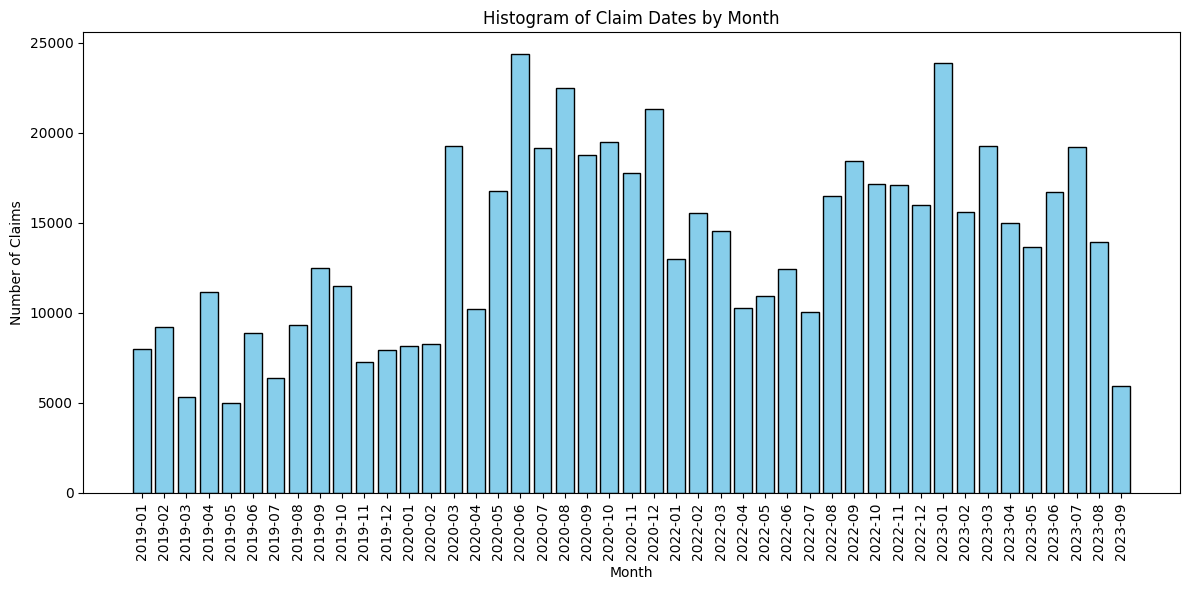

In [ ]:
# claim_date

# Extract the year and month from 'claim_date'
medical_claims['claim_date'] = pd.to_datetime(medical_claims['claim_date'])
year = medical_claims['claim_date'].dt.year
month = medical_claims['claim_date'].dt.month
medical_claims['month_year'] = medical_claims['claim_date'].dt.to_period('M')

# Count the number of claims for each month
claims_per_month = medical_claims['month_year'].value_counts().sort_index()

# Plot the histogram
claims_per_month.index = claims_per_month.index.to_timestamp()
plt.figure(figsize=(12, 6))
plt.bar(claims_per_month.index.strftime('%Y-%m'), claims_per_month.values, color='skyblue', edgecolor='black')
plt.title('Histogram of Claim Dates by Month')
plt.xlabel('Month')
plt.ylabel('Number of Claims')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit x-axis labels
plt.show()

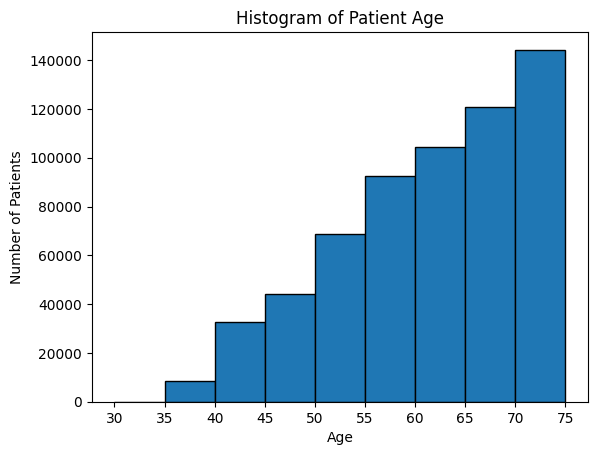

The number of patients grows with each successive age group, peaking in the 70-75 age bracket.


In [ ]:
# Patient age

# Plot the histogram
plt.hist(medical_claims['patient_age'], bins=range(30, 80, 5), edgecolor='black')
plt.title('Histogram of Patient Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.xticks(range(30, 80, 5))
plt.show()
print("The number of patients grows with each successive age group, peaking in the 70-75 age bracket.")

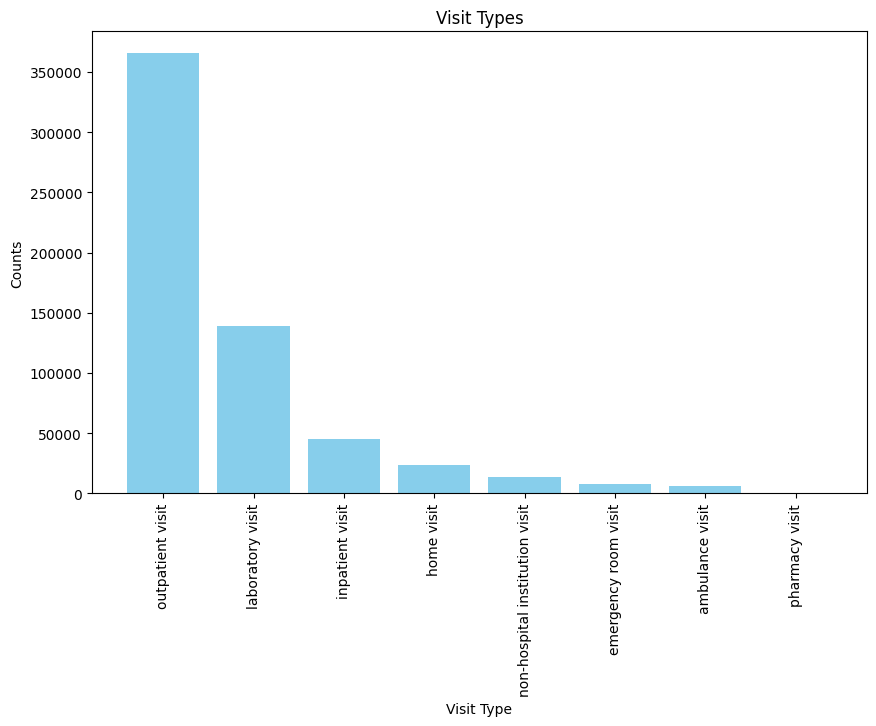

Outpatient visits accounts for the highest number of visit types, followed by laboratory visits, which have significantly fewer counts but is still the second most common visit type shown.


In [ ]:
# visit_type

# Count of each 'visit_type'
visit_type_counts = medical_claims['visit_type'].value_counts()

# Sort the counts from highest to lowest
visit_type_counts_sorted = visit_type_counts.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(visit_type_counts_sorted.index, visit_type_counts_sorted.values, color='skyblue')
plt.title('Visit Types')
plt.xlabel('Visit Type')
plt.ylabel('Counts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()
print('Outpatient visits accounts for the highest number of visit types, followed by laboratory visits, which have significantly fewer counts but is still the second most common visit type shown.')

# **prescription visualization**

In [ ]:
# Count the frequency of '169413212' and not '169413212' in the 'ndc' column.
# (169413212 is the ndc code for OZEMPIC-semaglutide-injection)
is_169413212 = prescription['ndc'] == 169413212
ndc_counts = is_169413212.value_counts(normalize=True).rename({True: '169413212 (OZEMPIC Injected)', False: 'Not 169413212 (Not Injected)'}) * 100
ndc_counts

ndc
Not 169413212 (Not Injected)    99.512197
169413212 (OZEMPIC Injected)     0.487803
Name: proportion, dtype: float64

# **2. Preprocessing Data**

In [ ]:
# Select patients aged 40-75
medical_claims = medical_claims[(medical_claims['patient_age'] >= 40) & (medical_claims['patient_age'] <= 75)]

# Select obese and hypertensive patients
# Function to check if the diag value starts with 'E66' or 'I10'(ICD-10CM Code for obesity is E66; ICD-10CM Code for hypertension is I10)
def check_values(val):
    val = str(val)
    return val.startswith('E66') or val.startswith('I10')

medical_claims = medical_claims[medical_claims[['diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5']].applymap(check_values).any(axis=1)]

/var/folders/bz/g4zc7htx7mb9lym_bdfst95h0000gn/T/ipykernel_8350/751724439.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  medical_claims = medical_claims[medical_claims[['diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5']].applymap(check_values).any(axis=1)]


In [ ]:
# extract columns from medical_claims dataset:
medical_claims = medical_claims[['journey_id', 'claim_date', 'patient_state', 'patient_short_zip', 'patient_age', 'patient_gender', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5', 'visit_type', 'proc_code', 'smart_allowed']]

# extract columns from prescription dataset:
prescription = prescription[['journey_id', 'patient_gender', 'patient_state', 'date_of_service', 'ndc']]
prescription.rename(columns={'patient_gender': 'patient_gender_pre'}, inplace=True)

# personally I think smart_allowed is the best choice for y, assuming if the medicine is effective, the cost should be lowered.
# ndc is the standard for differencing treatment group and control group. details are in the methodology explanation below.

In [ ]:
# merge the dataset using journey_id as key.
combined_data = pd.merge(medical_claims, prescription, on='journey_id', how='inner')

combined_data.info()

print(combined_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7733300 entries, 0 to 7733299
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   journey_id          object        
 1   claim_date          datetime64[ns]
 2   patient_short_zip   float64       
 3   patient_age         float64       
 4   patient_gender      object        
 5   diag_1              object        
 6   diag_2              object        
 7   diag_3              object        
 8   diag_4              object        
 9   diag_5              object        
 10  visit_type          object        
 11  proc_code           object        
 12  smart_allowed       float64       
 13  patient_gender_pre  object        
 14  patient_state       object        
 15  date_of_service     object        
 16  ndc                 int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(12)
memory usage: 1003.0+ MB
                         journey_id claim_

# **3. Causal Analysis Setup**
Discuss the potential endogeneity issues in estimating the treatment effect of Ozempic on the target population.  
Outline your strategy for addressing endogeneity, referencing the big-picture problem of causality and treatment effect estimation discussed in class.

# **Method description:**
1. Divide to 2 dataset according to diag_code: E66 for Obesity and i10 for Hypertension.  
2. Create class SelectiveRegularizationLinearRegression.  
3. For analysis, select patient_gender, visit_type as categorical_features; patient_age, patient_short_zip as numeric_features. For numeric_features, use the mean of each feature column to fill in the missing values for the column and Standardize data; for categorical_features, fill in the missing values with the values that occur most frequently in each feature, convert classification features to a unique onehotcoding format. During the conversion, if the model encounter a category that haven't met during training, this category will be ignored.  
4. For model, y is the smart_allowed, treatment is proc_code. Except for 'journey_id' and 'claim_date', all is used in X variable for control endogeneity.  
5. Operate 2 stage Lasso regression. Using the previous set "SelectiveRegularizationLinearRegression".  
6. Obtained the  model's index of goodness of fit of training set and test set.  
7. In Q6, we added patient_state as a variable influencing treatment, enforcing the ability to decrease endogeneity.  

## Potential endogeneity issues in estimating the treatment effect of Ozempic on the target population.  

1. patient_age:

**Rationale**: Older patients may have different healthcare requirements and are more likely to suffer from multiple chronic conditions, potentially leading to higher healthcare utilization and costs.

2. patient_short_zip:

**Rationale**: Geographic location might be related to the accessibility of healthcare services, regional healthcare practices, and the socio-economic status of the area. These factors can impact healthcare costs and the types of healthcare services utilized.

3. patient_gender_F and patient_gender_M:

**Rationale**: Gender can influence the prevalence of certain diseases, treatment pathways, and potentially the outcomes of treatments. But the significant negative coefficients here might indicate data issues or model specification problems.

4. visit_type_ambulance visit and visit_type_emergency room visit:

**Rationale**: Ambulance visits and emergency room visits are typically associated with more severe health conditions, which can lead to higher costs.


## Strategy for addressing endogeneity
In the first stage Lasso, we use the patient_age, patient_short_zip, patient_gender and visit_type to regress treatment to eliminate endogeneity.

# **4. Model Development**

In [ ]:
# devide medical_claim into 2 different subsets based on diagnosis
def check_E66(val):
    val = str(val)
    return val.startswith('E66')

def check_I10(val):
    val = str(val)
    return val.startswith('I10')

medical_claims['treatment'] = medical_claims['proc_code'].apply(lambda x: 1 if x == 'J3490' else 0)

medical_claims_E66 = medical_claims[medical_claims[['diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5']].map(check_E66).any(axis=1)]
medical_claims_E66 = medical_claims_E66.drop(['diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5'], axis=1)

medical_claims_I10 = medical_claims[medical_claims[['diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5']].map(check_I10).any(axis=1)]
medical_claims_I10 = medical_claims_I10.drop(['diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5'], axis=1)

In [ ]:
class SelectiveRegularizationLinearRegression:
    def __init__(self, alpha, apply_penalty, tolerance=1e-4, max_iterations=1000):
        self.alpha = alpha
        self.tolerance = tolerance
        self.apply_penalty = apply_penalty
        self.max_iterations = max_iterations
        self.w = None

    def _predicted_values(self, X, w):
        return np.matmul(X, w)

    def _rho_compute(self, y, X, w, j):
        X_k = np.delete(X, j, 1)
        w_k = np.delete(w, j)
        predict_k = self._predicted_values(X_k, w_k)
        residual = y - predict_k
        rho_j = np.sum(X[:, j] * residual)
        return rho_j

    def _z_compute(self, X):
        return np.sum(X * X, axis=0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        if not self.w:
            self.w = np.zeros(n_features)
        z = self._z_compute(X)
        for iteration in range(self.max_iterations):
            max_step = 0
            for j in range(n_features):
                rho_j = self._rho_compute(y, X, self.w, j)
                w_j_old = self.w[j]
                if j == 0:
                    self.w[j] = rho_j / z[j]
                else:
                    if self.apply_penalty[j]:
                        if rho_j < -self.alpha * n_samples:
                            self.w[j] = (rho_j + self.alpha * n_samples) / z[j]
                        elif -self.alpha * n_samples <= rho_j <= self.alpha * n_samples:
                            self.w[j] = 0.
                        elif rho_j > self.alpha * n_samples:
                            self.w[j] = (rho_j - self.alpha * n_samples) / z[j]
                    else:
                        self.w[j] = rho_j / z[j]
                max_step = max(max_step, abs(self.w[j] - w_j_old))
            if max_step < self.tolerance:
                break

        return self

    def predict(self, X):
        if self.w is None:
            raise ValueError("Model is not fitted yet!")
        return self._predicted_values(X, self.w)

    def coeffs(self):
        print(f"Treatment Coefficient: {self.w[0]}")

## 4.1 E66 Analysis

In [ ]:
import pandas as pd
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
categorical_features = ['patient_gender','visit_type']
numeric_features = ['patient_age', 'patient_short_zip']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X = preprocessor.fit_transform(medical_claims_E66.drop(['journey_id', 'claim_date', 'proc_code', 'smart_allowed', 'treatment'], axis=1))
y = medical_claims_E66['smart_allowed']
treatment = medical_claims_E66['treatment']

X_train, X_test, treatment_train, treatment_test, y_train, y_test = train_test_split(X, treatment, y, test_size=0.2, random_state=42)

lasso_treatment = LassoCV(cv=5).fit(X_train, treatment_train)
d_hat_train = lasso_treatment.predict(X_train)
d_hat_test = lasso_treatment.predict(X_test)

all_covariates_train = np.column_stack((treatment_train, d_hat_train.reshape(-1,1), X_train))
all_covariates_test = np.column_stack((treatment_test, d_hat_test.reshape(-1,1), X_test))

penalty_array = np.ones(all_covariates_train.shape[1], dtype=bool)

penalty_array[1] = False

alpha = 0.01
max_iterations = 1000
model = SelectiveRegularizationLinearRegression(alpha, penalty_array, max_iterations)

model.fit(all_covariates_train, y_train)

y_train_pred = model.predict(all_covariates_train)
y_test_pred = model.predict(all_covariates_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Performance:")
print(f"MSE: {train_mse}, RMSE: {train_rmse}, R^2: {train_r2}")

print("\nTesting Performance:")
print(f"MSE: {test_mse}, RMSE: {test_rmse}, R^2: {test_r2}")

model.coeffs()

patient_age: -2.697041950083531
patient_short_zip: 5.637943207549512
patient_gender_F: -4892117056729.441
patient_gender_M: -4892117056756.82
visit_type_ambulance visit: -172.88345517706475
visit_type_emergency room visit: -64.36614136134386


### Justification for Variables
1. patient_age:

**Rationale**: Older patients may have different healthcare requirements and are more likely to suffer from multiple chronic conditions, potentially leading to higher healthcare utilization and costs.

2. patient_short_zip:

**Rationale**: Geographic location might be related to the accessibility of healthcare services, regional healthcare practices, and the socio-economic status of the area. These factors can impact healthcare costs and the types of healthcare services utilized.

3. patient_gender_F and patient_gender_M:

**Rationale**: Gender can influence the prevalence of certain diseases, treatment pathways, and potentially the outcomes of treatments. But the significant negative coefficients here might indicate data issues or model specification problems.

4. visit_type_ambulance visit and visit_type_emergency room visit:

**Rationale**: Ambulance visits and emergency room visits are typically associated with more severe health conditions, which can lead to higher costs.

## 4.2 I10 Analysis

In [ ]:
categorical_features = ['patient_gender','visit_type']
numeric_features = ['patient_age', 'patient_short_zip']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X = preprocessor.fit_transform(medical_claims_I10.drop(['journey_id', 'claim_date', 'proc_code', 'smart_allowed', 'treatment'], axis=1))
y = medical_claims_I10['smart_allowed']
treatment = medical_claims_I10['treatment']

X_train, X_test, treatment_train, treatment_test, y_train, y_test = train_test_split(X, treatment, y, test_size=0.2, random_state=42)

lasso_treatment = LassoCV(cv=5).fit(X_train, treatment_train)
d_hat_train = lasso_treatment.predict(X_train)
d_hat_test = lasso_treatment.predict(X_test)

all_covariates_train = np.column_stack((treatment_train, d_hat_train.reshape(-1,1), X_train))
all_covariates_test = np.column_stack((treatment_test, d_hat_test.reshape(-1,1), X_test))

penalty_array = np.ones(all_covariates_train.shape[1], dtype=bool)

penalty_array[1] = False

alpha = 0.01
max_iterations = 1000
model = SelectiveRegularizationLinearRegression(alpha, penalty_array, max_iterations)

model.fit(all_covariates_train, y_train)

y_train_pred = model.predict(all_covariates_train)
y_test_pred = model.predict(all_covariates_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Performance:")
print(f"MSE: {train_mse}, RMSE: {train_rmse}, R^2: {train_r2}")

print("\nTesting Performance:")
print(f"MSE: {test_mse}, RMSE: {test_rmse}, R^2: {test_r2}")

model.coeffs()

patient_age: -2.1224009094336616
patient_short_zip: 11.797644854471663
patient_gender_F: -610030712680.473
patient_gender_M: -610030712697.9247


### Justification for Variables
1. patient_age:

**Rationale**: Older patients may have different healthcare requirements and are more likely to suffer from multiple chronic conditions, potentially leading to higher healthcare utilization and costs.

2. patient_short_zip:

**Rationale**: Geographic location might be related to the accessibility of healthcare services, regional healthcare practices, and the socio-economic status of the area. These factors can impact healthcare costs and the types of healthcare services utilized.

3. patient_gender_F and patient_gender_M:

**Rationale**: Gender can influence the prevalence of certain diseases, treatment pathways, and potentially the outcomes of treatments. But the significant negative coefficients here might indicate data issues or model specification problems.

# QUESTION 6

In [ ]:
# Define categorical and numeric features
categorical_features = ['patient_gender','visit_type', 'patient_state']
numeric_features = ['patient_age', 'patient_short_zip']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X = preprocessor.fit_transform(medical_claims_E66.drop(['journey_id', 'claim_date', 'proc_code', 'smart_allowed', 'treatment'], axis=1))
y = medical_claims_E66['smart_allowed']
treatment = medical_claims_E66['treatment']

X_train, X_test, treatment_train, treatment_test, y_train, y_test = train_test_split(X, treatment, y, test_size=0.2, random_state=42)

lasso_treatment = LassoCV(cv=5).fit(X_train, treatment_train)
d_hat_train = lasso_treatment.predict(X_train)
d_hat_test = lasso_treatment.predict(X_test)

all_covariates_train = np.column_stack((treatment_train, d_hat_train.reshape(-1,1), X_train))
all_covariates_test = np.column_stack((treatment_test, d_hat_test.reshape(-1,1), X_test))

penalty_array = np.ones(all_covariates_train.shape[1], dtype=bool)

penalty_array[1] = False

alpha = 0.01
max_iterations = 1000
model = SelectiveRegularizationLinearRegression(alpha, penalty_array, max_iterations)

model.fit(all_covariates_train, y_train)

y_train_pred = model.predict(all_covariates_train)
y_test_pred = model.predict(all_covariates_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Performance:")
print(f"MSE: {train_mse}, RMSE: {train_rmse}, R^2: {train_r2}")

print("\nTesting Performance:")
print(f"MSE: {test_mse}, RMSE: {test_rmse}, R^2: {test_r2}")

model.coeffs()

In [ ]:
def group_states(state):
    if state != 'CA':
        return 'Other'
    return state

medical_claims_I10['patient_state_group'] = medical_claims_I10['patient_state'].apply(group_states)

# Define the categorical and numerical features
categorical_features = ['patient_gender','visit_type', 'patient_state_group']
numeric_features = ['patient_age', 'patient_short_zip']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X = preprocessor.fit_transform(medical_claims_I10.drop(['journey_id', 'claim_date', 'proc_code', 'smart_allowed', 'treatment'], axis=1))
y = medical_claims_I10['smart_allowed']
treatment = medical_claims_I10['treatment']

X_train, X_test, treatment_train, treatment_test, y_train, y_test = train_test_split(X, treatment, y, test_size=0.2, random_state=42)

lasso_treatment = LassoCV(cv=5).fit(X_train, treatment_train)
d_hat_train = lasso_treatment.predict(X_train)
d_hat_test = lasso_treatment.predict(X_test)

all_covariates_train = np.column_stack((treatment_train, d_hat_train.reshape(-1,1), X_train))
all_covariates_test = np.column_stack((treatment_test, d_hat_test.reshape(-1,1), X_test))

penalty_array = np.ones(all_covariates_train.shape[1], dtype=bool)

penalty_array[1] = False

alpha = 0.01
max_iterations = 1000
model = SelectiveRegularizationLinearRegression(alpha, penalty_array, max_iterations)

model.fit(all_covariates_train, y_train)

y_train_pred = model.predict(all_covariates_train)
y_test_pred = model.predict(all_covariates_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Performance:")
print(f"MSE: {train_mse}, RMSE: {train_rmse}, R^2: {train_r2}")

print("\nTesting Performance:")
print(f"MSE: {test_mse}, RMSE: {test_rmse}, R^2: {test_r2}")

model.coeffs()